## Exploration data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
raw_data = pd.read_csv('data/medical_cases1.csv')
raw_data

,description,transcription,sample_name,medical_specialty,keywords
0,Patient having severe sinusitis about two to t...,"HISTORY:, I had the pleasure of meeting and e...",Chronic Sinusitis,Allergy / Immunology,NaN
1,A female for a complete physical and follow up...,"SUBJECTIVE: , This is a 42-year-old white fema...",Followup on Asthma,Allergy / Immunology,NaN
2,Mother states he has been wheezing and coughing.,"CHIEF COMPLAINT: , This 5-year-old male presen...",Asthma in a 5-year-old,Allergy / Immunology,NaN
3,"Acute allergic reaction, etiology uncertain, h...","HISTORY: , A 34-year-old male presents today s...",Allergy Evaluation Consult,Allergy / Immunology,NaN
4,"The patient died of a pulmonary embolism, the ...","SUMMARY OF CLINICAL HISTORY:, The patient was...",Autopsy - 8,Autopsy,NaN
...,...,...,...,...,...
4309,"Patient with a diagnosis of pancreatitis, deve...","HISTORY:, The patient was in the intensive ca...",Nephrology Consultation - 3,Consult - History and Phy.,"consult - history and phy., intubated, consult..."
4310,The patient with recurrent nongranulomatous an...,"PAST MEDICAL HISTORY: , Significant for GERD, ...",Uveitis,Consult - History and Phy.,"consult - history and phy., iritis, nongranulo..."
4311,Consultation because of irregular periods and ...,She started her periods at age 13. She is com...,OB/GYN Consultation - 3,Consult - History and Phy.,"consult - history and phy., irregular periods,..."
4312,Pneumatosis coli in the cecum. Possible ische...,"REASON FOR CONSULTATION: , Pneumatosis coli in...",Ischemic Cecum - Consult,Consult - History and Phy.,"consult - history and phy., ischemic cecum, me..."


Counting words, sentences and categories

In [4]:
from src.data_cleaning import count_sentences, count_words


raw_data = raw_data[raw_data['transcription'].notna()]
data = raw_data[['transcription', 'medical_specialty']]

print(
    'Number of sentences in transcriptions column: %d' % count_sentences(
        data['transcription'].tolist()),
    'Number of unique words in transcriptions column: %d' % count_words(
        data['transcription'].tolist()),
    sep='\n',
)

data_categories = data.groupby('medical_specialty')

print('\nOriginal Categories:')
for i, k in enumerate(data_categories):
    c_name, c_data = k
    print('Category %d: %s %d' % (i, c_name, len(c_data)))

2022-12-05 16:35:58.567991: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-05 16:35:59.572174: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-05 16:35:59.572270: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-12-05 16:35:59.572278: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

Number of sentences in transcriptions column: 151094
Number of unique words in transcriptions column: 33858

Original Categories:
Category 0: Allergy / Immunology 14
Category 1: Autopsy 16
Category 2: Cardiovascular / Pulmonary 742
Category 3: Consult - History and Phy. 915
Category 4: Cosmetic / Plastic Surgery 29
Category 5: Dentistry 30
Category 6: Dermatology 34
Category 7: Diets and Nutritions 10
Category 8: ENT - Otolaryngology 80
Category 9: Emergency Room Reports 121
Category 10: Endocrinology 23
Category 11: Gastroenterology 222
Category 12: General Medicine 347
Category 13: Hematology - Oncology 120
Category 14: Hospice - Palliative Care 7
Category 15: Lab Medicine - Pathology 8
Category 16: Nephrology 71
Category 17: Neurology 282
Category 18: Neurosurgery 109
Category 19: Obstetrics / Gynecology 182
Category 20: Office Notes 60
Category 21: Ophthalmology 66
Category 22: Orthopedic 408
Category 23: Pediatrics - Neonatal 64
Category 24: Physical Medicine - Rehab 20
Category 2

## Cleaning data

Deleting rare categories

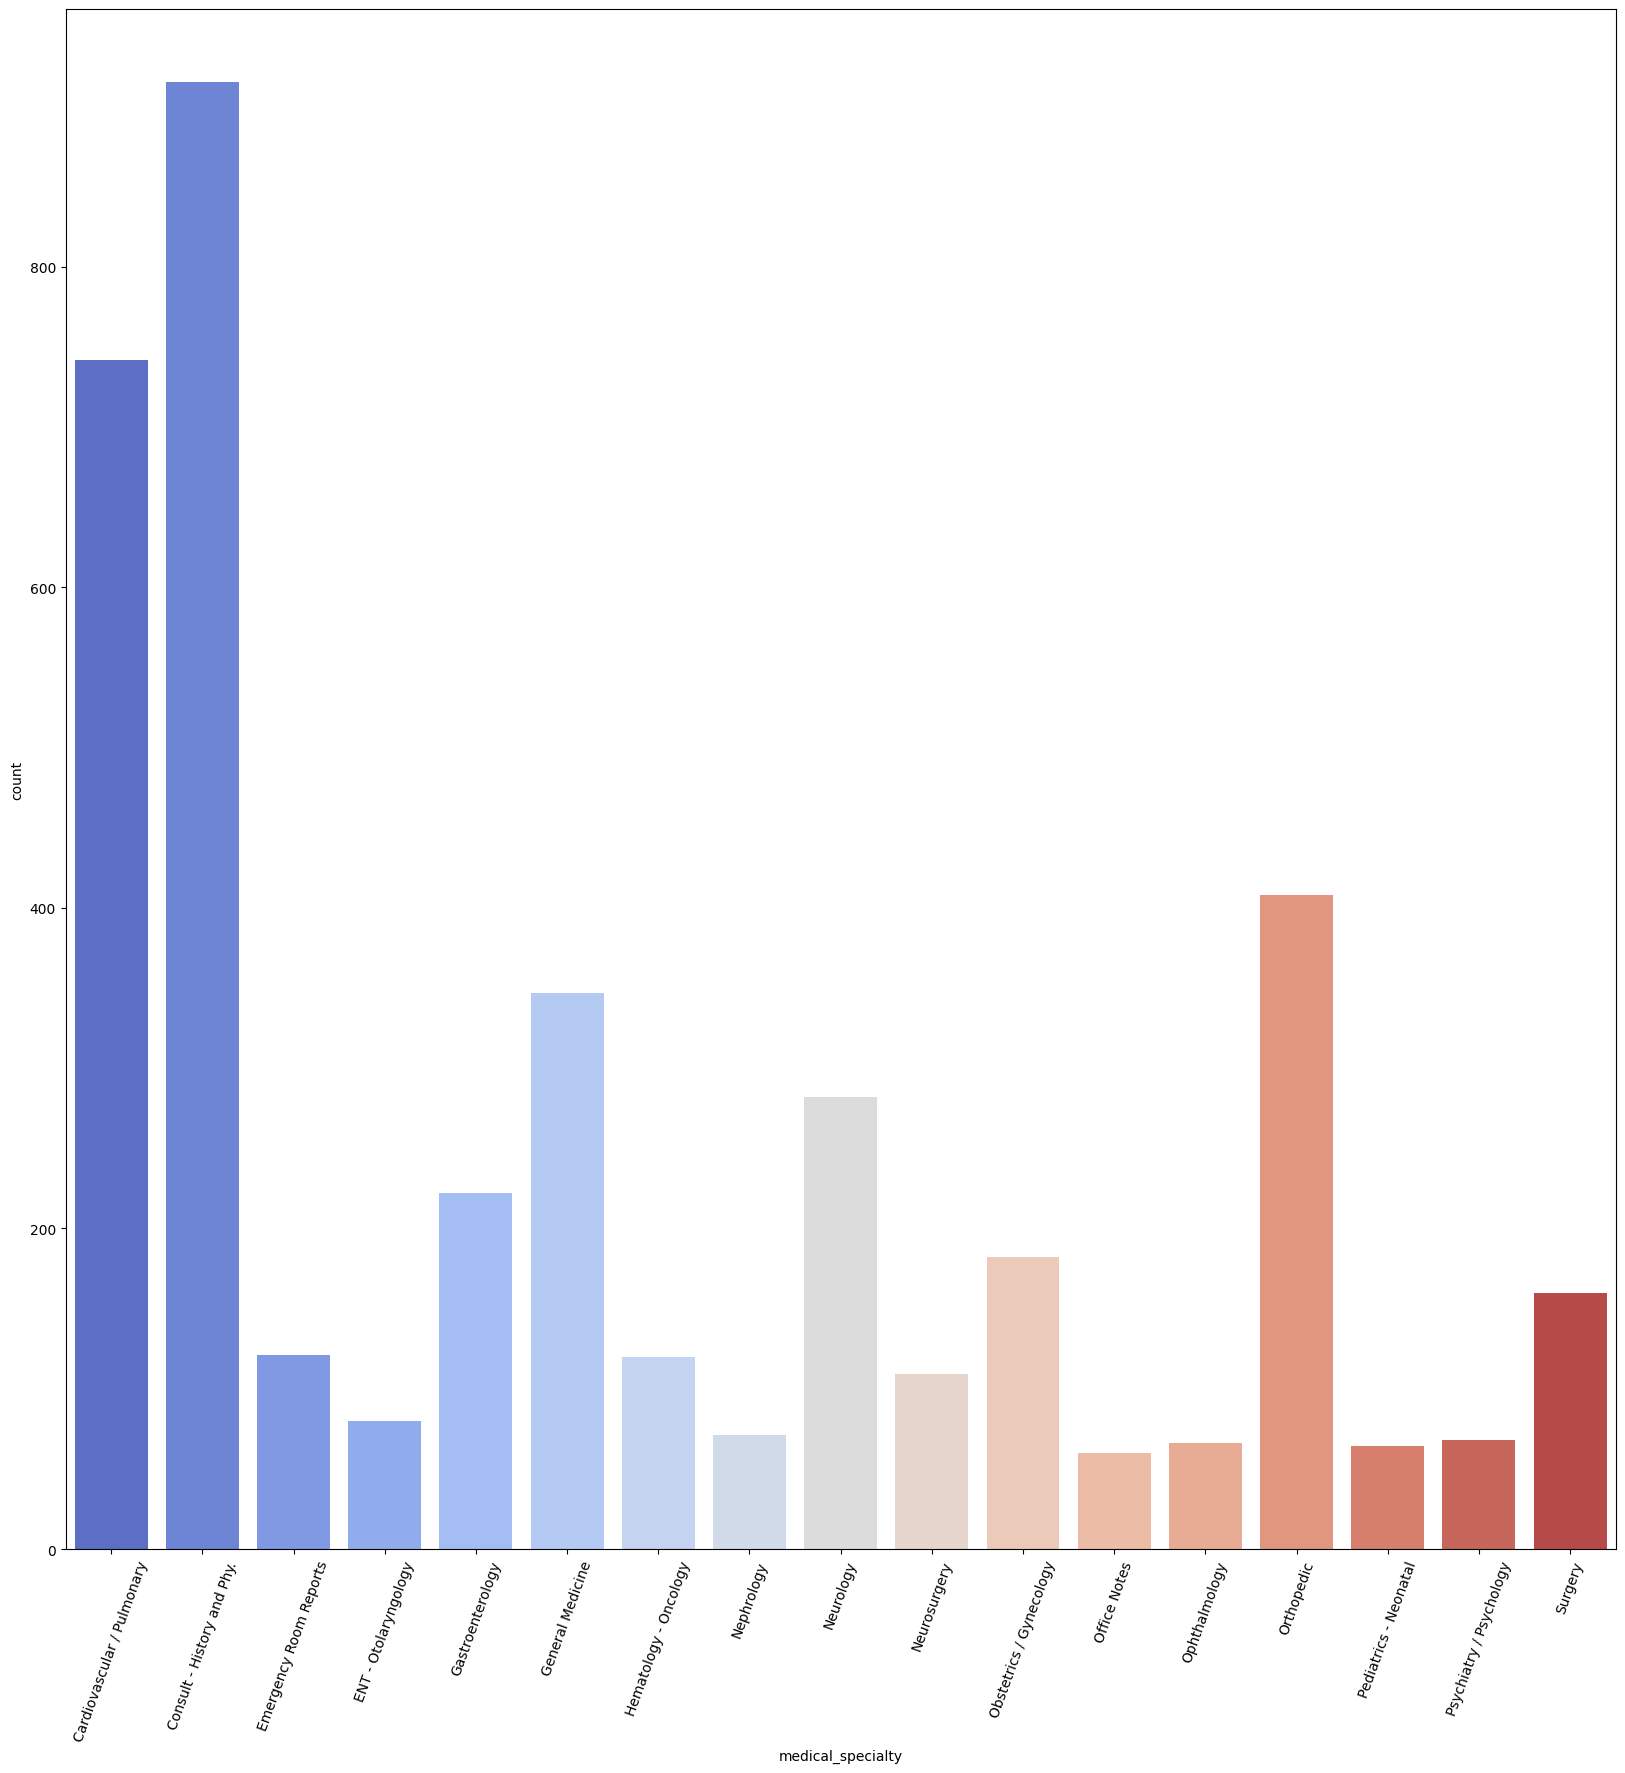

,transcription,medical_specialty
12,"REASON FOR CONSULTATION:, Ventricular ectopy ...",Cardiovascular / Pulmonary
13,"CHIEF COMPLAINT:, ""Trouble breathing."",HISTORY...",Cardiovascular / Pulmonary
14,"EXAM: , Transesophageal echocardiogram and dir...",Cardiovascular / Pulmonary
15,"HISTORY: ,I had the pleasure of meeting and e...",Cardiovascular / Pulmonary
16,"On review of systems, the patient admits to hy...",Cardiovascular / Pulmonary
...,...,...
4309,"HISTORY:, The patient was in the intensive ca...",Consult - History and Phy.
4310,"PAST MEDICAL HISTORY: , Significant for GERD, ...",Consult - History and Phy.
4311,She started her periods at age 13. She is com...,Consult - History and Phy.
4312,"REASON FOR CONSULTATION: , Pneumatosis coli in...",Consult - History and Phy.


In [5]:
data = data_categories.filter(lambda x: x.shape[0] > 50)

plt.figure(figsize=(20,20))
sns.countplot(data=data, x='medical_specialty', palette ='coolwarm')
plt.xticks(rotation=70)
plt.show()

data

Transcriptions cleaning

In [6]:
print('~~~~~~BEFORE~~~~~~',  data.iloc[125]['transcription'], '\n', sep='\n')

from src.data_cleaning import clean_text
data['transcription'] = data.loc[:, 'transcription'].apply(clean_text)

print('~~~~~~AFTER~~~~~~', data.iloc[125]['transcription'], '\n', sep='\n')

~~~~~~BEFORE~~~~~~
IDENTIFYING DATA:,  This is a 40-year-old male seen today for a 90-day revocation admission.  He had been reported by his case manager as being noncompliant with medications, refusing oral or IM medications, became agitated, had to be taken to ABCD for evaluation, admitted at that time to auditory hallucinations and confusion and was committed for admission at this time.  He has a psychiatric history of schizophrenia, was previously admitted here at XYZ on 12/19/2009, had another voluntary admission in ABCD in 1998.,MEDICATIONS: , Listed as Invega and Risperdal.,ALLERGIES: , None known to medications.,PAST MEDICAL HISTORY:  ,The only identified problem in his chart is that he is being treated for hyperlipidemia with gemfibrozil.  The patient is unaware and cannot remember what medications he had been taking or whether he had been taking them at all as an outpatient.,FAMILY HISTORY: , Listed as unknown in the chart as far as other psychiatric illnesses.  The patient h

## Vectorization with TF-IDF

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

from src.reporting import vectorization_results

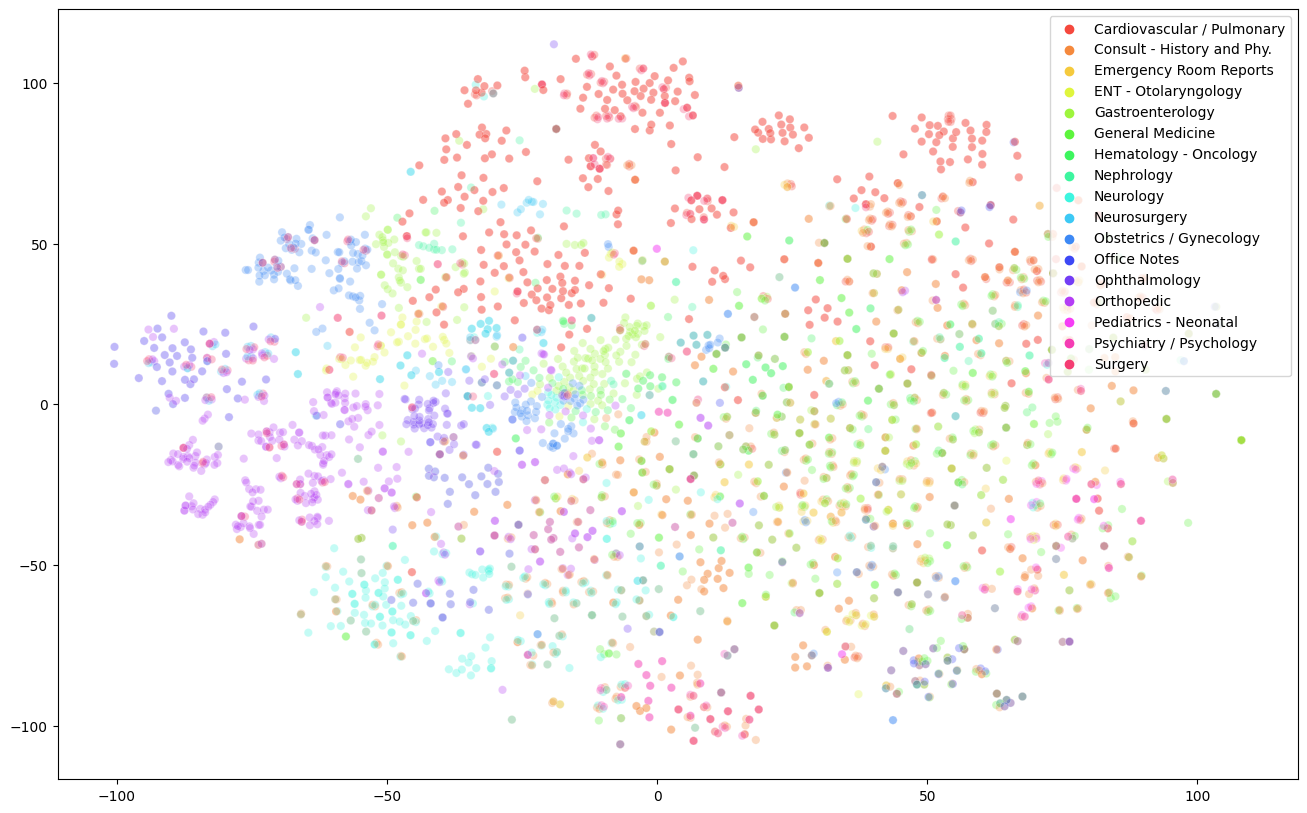

In [8]:
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=1000)
docterm_matrix = vectorizer.fit_transform(data['transcription'].tolist())

vectorization_results(docterm_matrix.toarray(), data['medical_specialty'].tolist())

## Modeling with logistic regression

In [9]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from src.reporting import learning_results

In [10]:
pca = PCA(n_components=0.9)
docterm_matrix_reduced = pca.fit_transform(docterm_matrix.toarray())

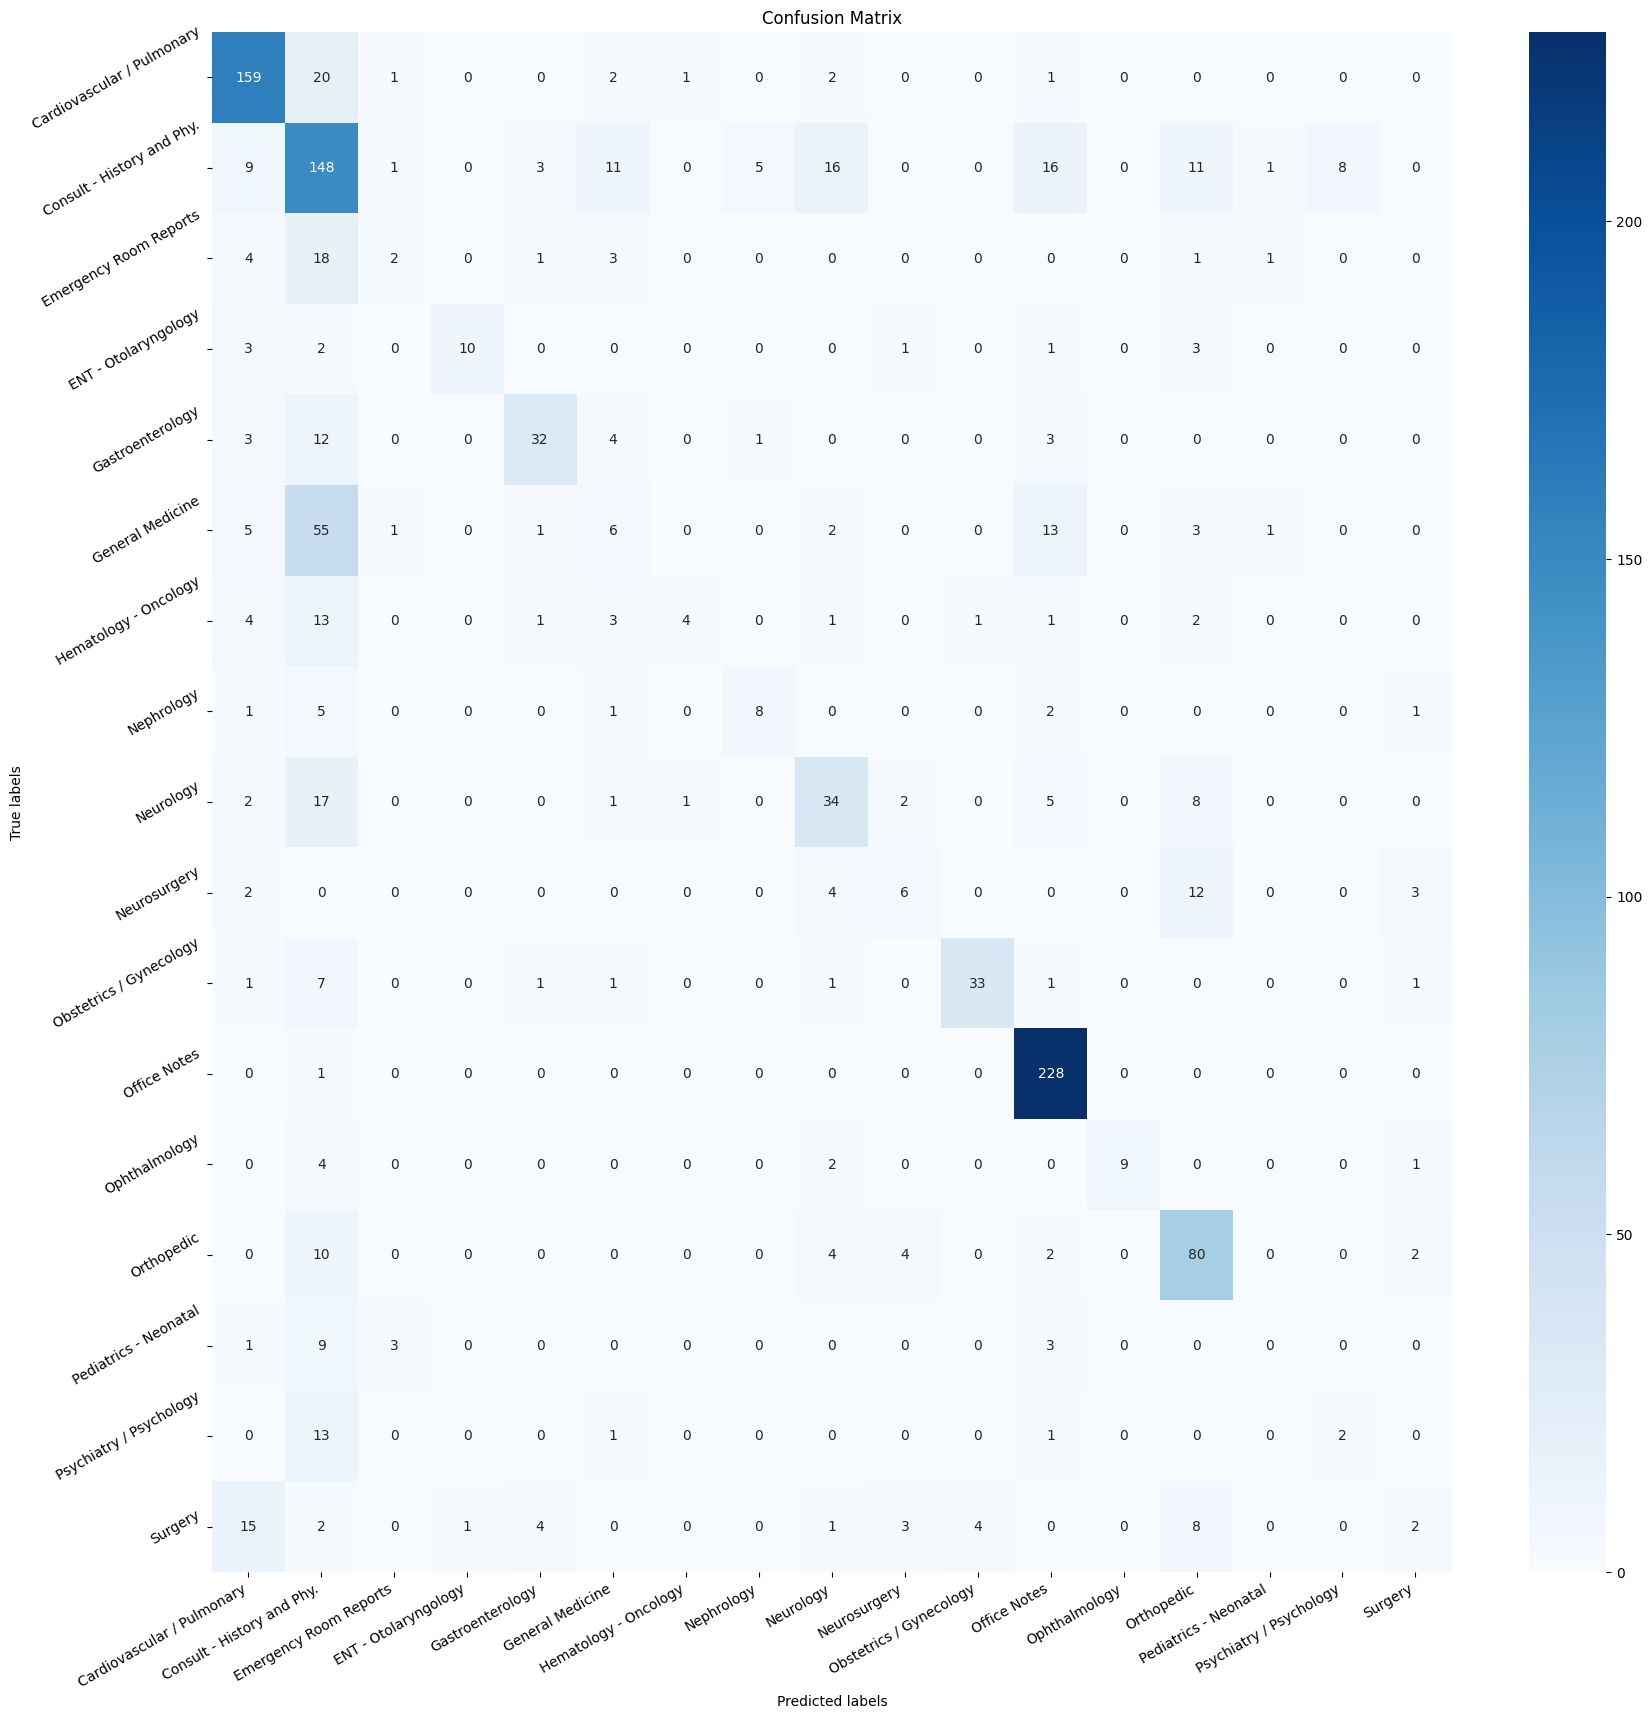

                            precision    recall  f1-score   support

Cardiovascular / Pulmonary       0.76      0.85      0.81       186
Consult - History and Phy.       0.44      0.65      0.52       229
    Emergency Room Reports       0.25      0.07      0.11        30
      ENT - Otolaryngology       0.91      0.50      0.65        20
          Gastroenterology       0.74      0.58      0.65        55
          General Medicine       0.18      0.07      0.10        87
     Hematology - Oncology       0.67      0.13      0.22        30
                Nephrology       0.57      0.44      0.50        18
                 Neurology       0.51      0.49      0.50        70
              Neurosurgery       0.38      0.22      0.28        27
   Obstetrics / Gynecology       0.87      0.72      0.79        46
              Office Notes       0.82      1.00      0.90       229
             Ophthalmology       1.00      0.56      0.72        16
                Orthopedic       0.62      0.78

In [11]:
labels, category_list = data['medical_specialty'].tolist(), data['medical_specialty'].unique()
from imblearn.over_sampling import SMOTE
smote_over_sample = SMOTE(sampling_strategy='minority')

x, y = smote_over_sample.fit_resample(docterm_matrix_reduced, labels)
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=1)   

#x_train, x_test, y_train, y_test = train_test_split(docterm_matrix_reduced, labels, stratify=labels, random_state=1)

clf = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, random_state=1).fit(x_train, y_train)
y_test_pred = clf.predict(x_test)

learning_results(y_test, y_test_pred, category_list)

## SVM

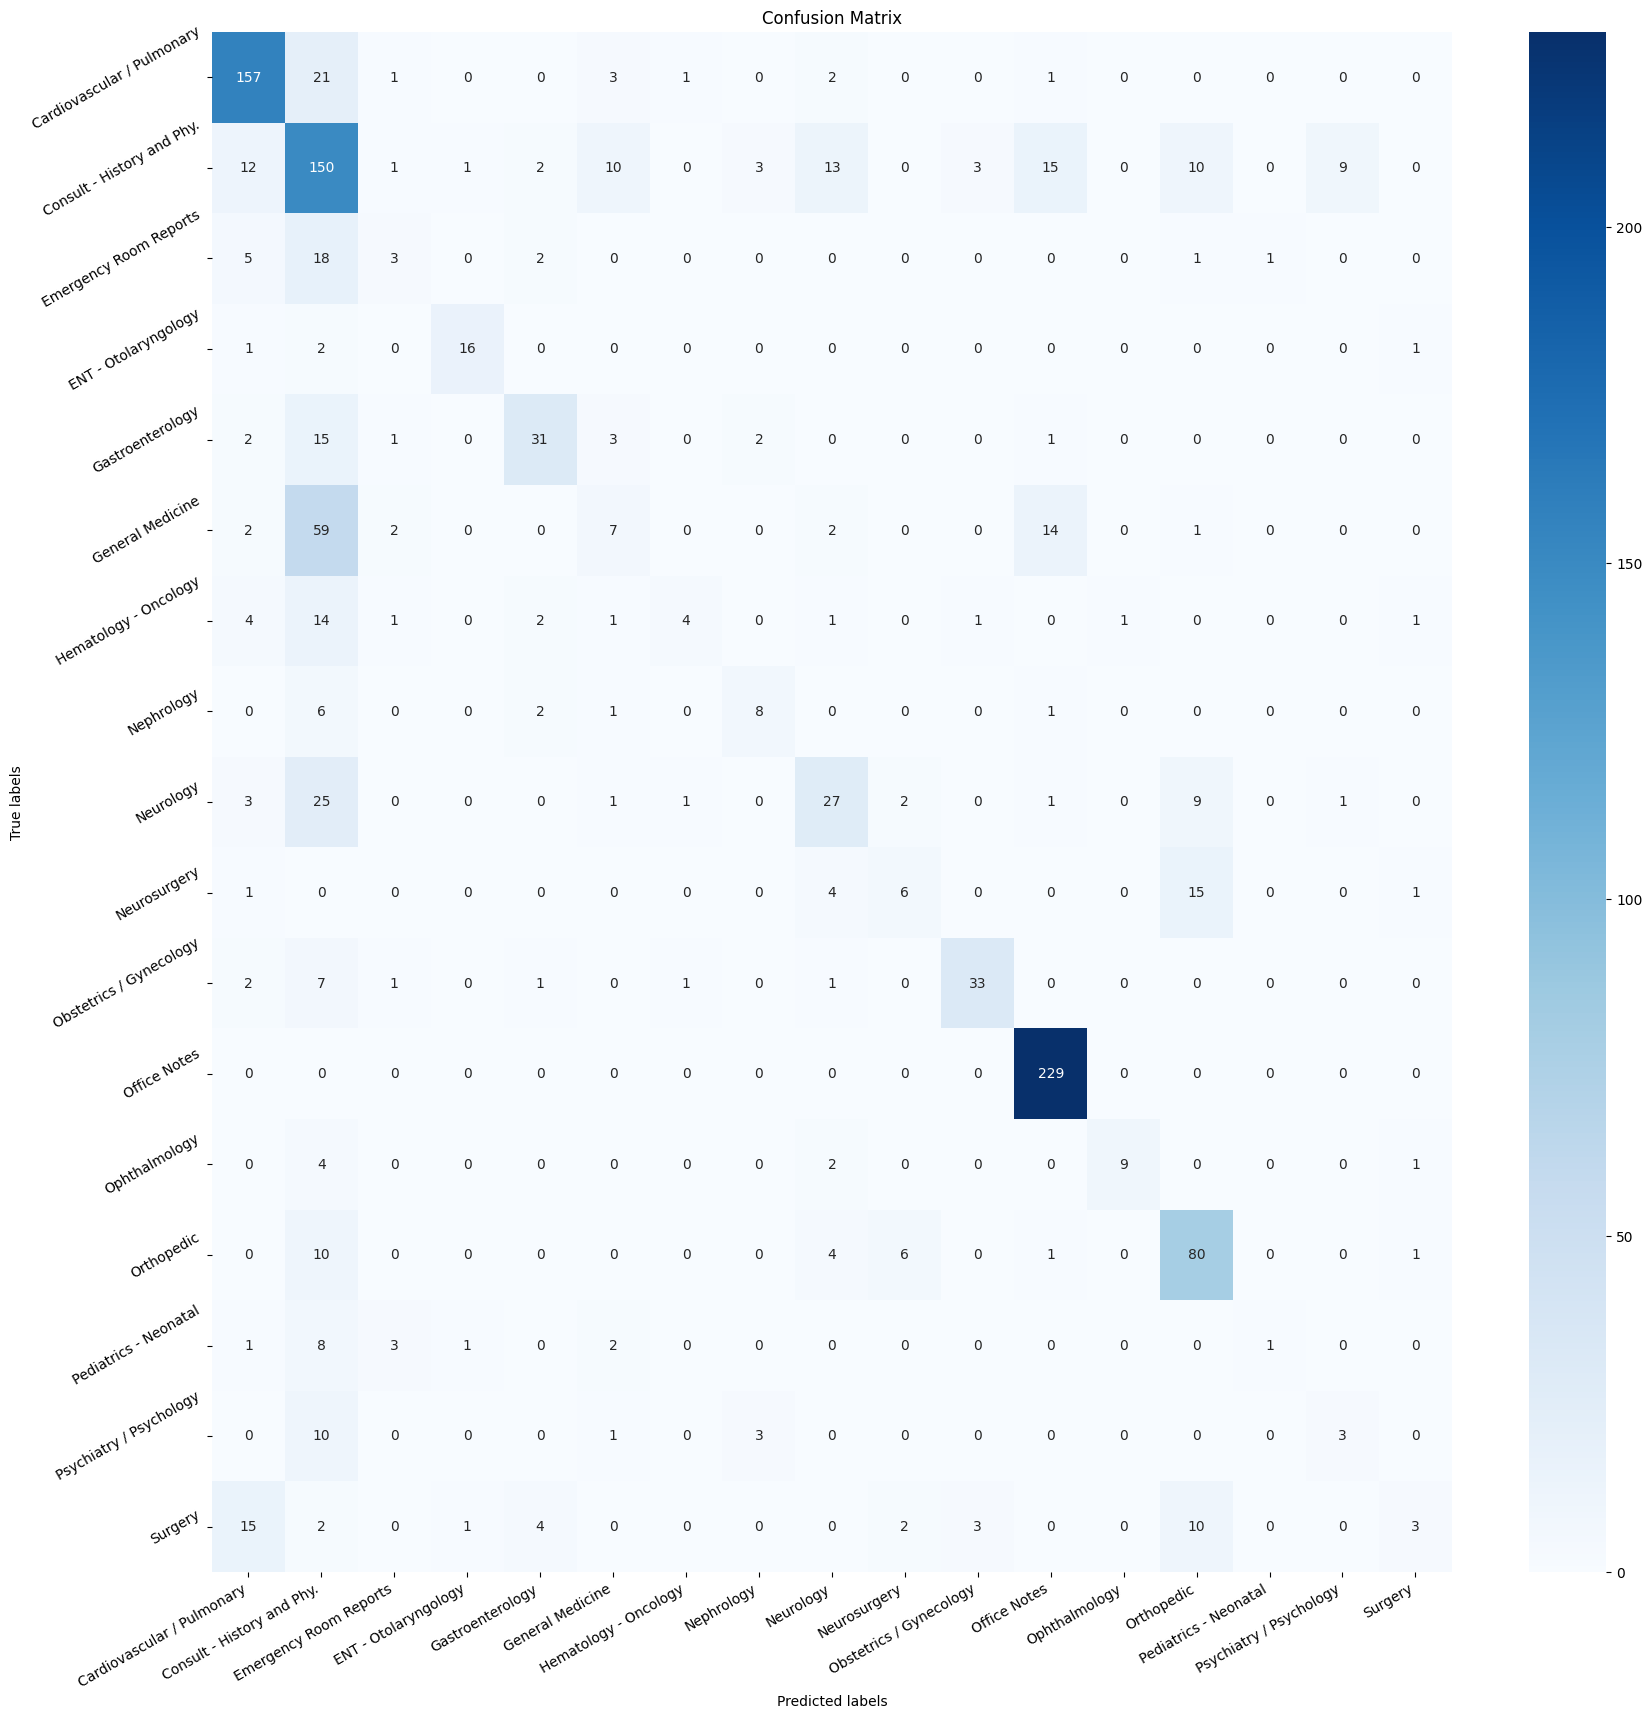

                            precision    recall  f1-score   support

Cardiovascular / Pulmonary       0.77      0.84      0.80       186
Consult - History and Phy.       0.43      0.66      0.52       229
    Emergency Room Reports       0.23      0.10      0.14        30
      ENT - Otolaryngology       0.84      0.80      0.82        20
          Gastroenterology       0.70      0.56      0.63        55
          General Medicine       0.24      0.08      0.12        87
     Hematology - Oncology       0.57      0.13      0.22        30
                Nephrology       0.50      0.44      0.47        18
                 Neurology       0.48      0.39      0.43        70
              Neurosurgery       0.38      0.22      0.28        27
   Obstetrics / Gynecology       0.82      0.72      0.77        46
              Office Notes       0.87      1.00      0.93       229
             Ophthalmology       0.90      0.56      0.69        16
                Orthopedic       0.63      0.78

In [12]:
from sklearn import svm
from sklearn.metrics import accuracy_score

SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(x_train, y_train)

y_test_pred = SVM.predict(x_test)

learning_results(y_test, y_test_pred, category_list)

## Improving model

### Manipulations with categories

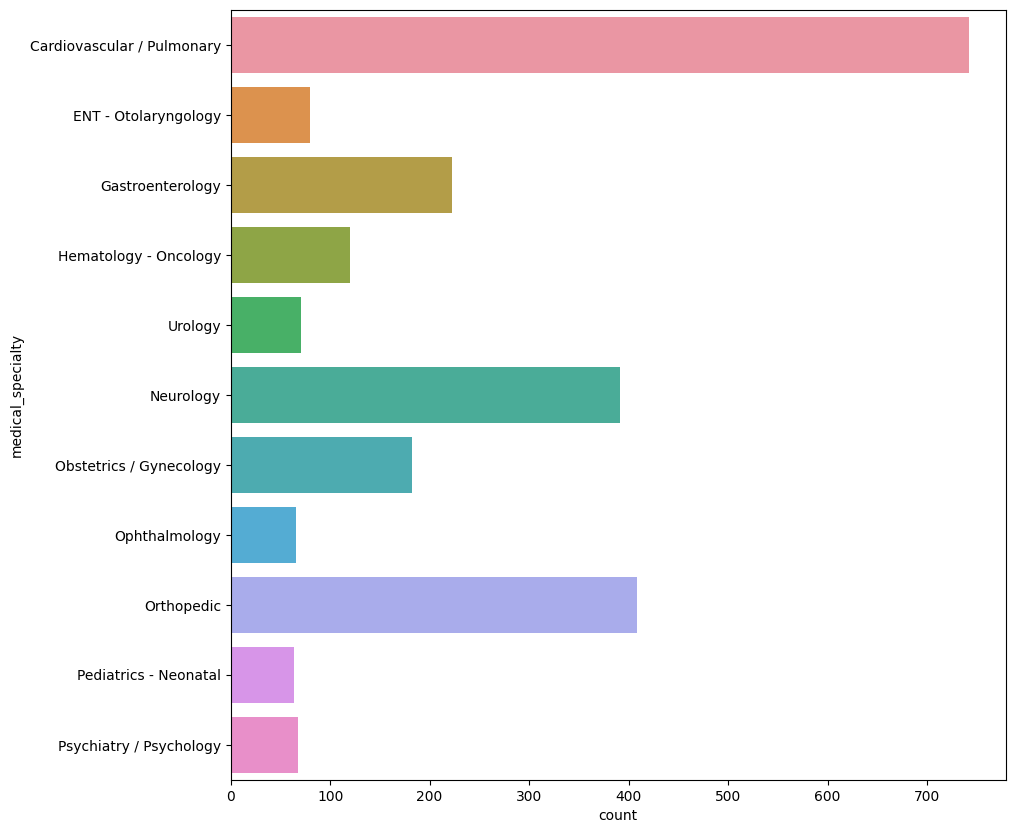

In [13]:
data2 = data.copy()

data2['medical_specialty'] = data2['medical_specialty'].apply(lambda x:str.strip(x))

rebuild_categories = [
        'Surgery', 
        'SOAP / Chart / Progress Notes', 
        'Office Notes', 
        'Consult - History and Phy.', 
        'Emergency Room Reports',
        'Discharge Summary',
        'Pain Management',
        'General Medicine',
]

for category in rebuild_categories:
    mask = data2['medical_specialty'] == category
    data2 = data2[~mask]


mask = data2['medical_specialty'] == 'Surgery'
data2 = data2[~mask]
#final_data2 = data2.groupby(data2['medical_specialty'])

mask = data2['medical_specialty'] == 'Neurosurgery'
data2.loc[mask, 'medical_specialty'] = 'Neurology'

mask = data2['medical_specialty'] == 'Nephrology'
data2.loc[mask, 'medical_specialty'] = 'Urology'

plt.figure(figsize=(10, 10))
sns.countplot(y='medical_specialty', data=data2)
plt.show()

# data2

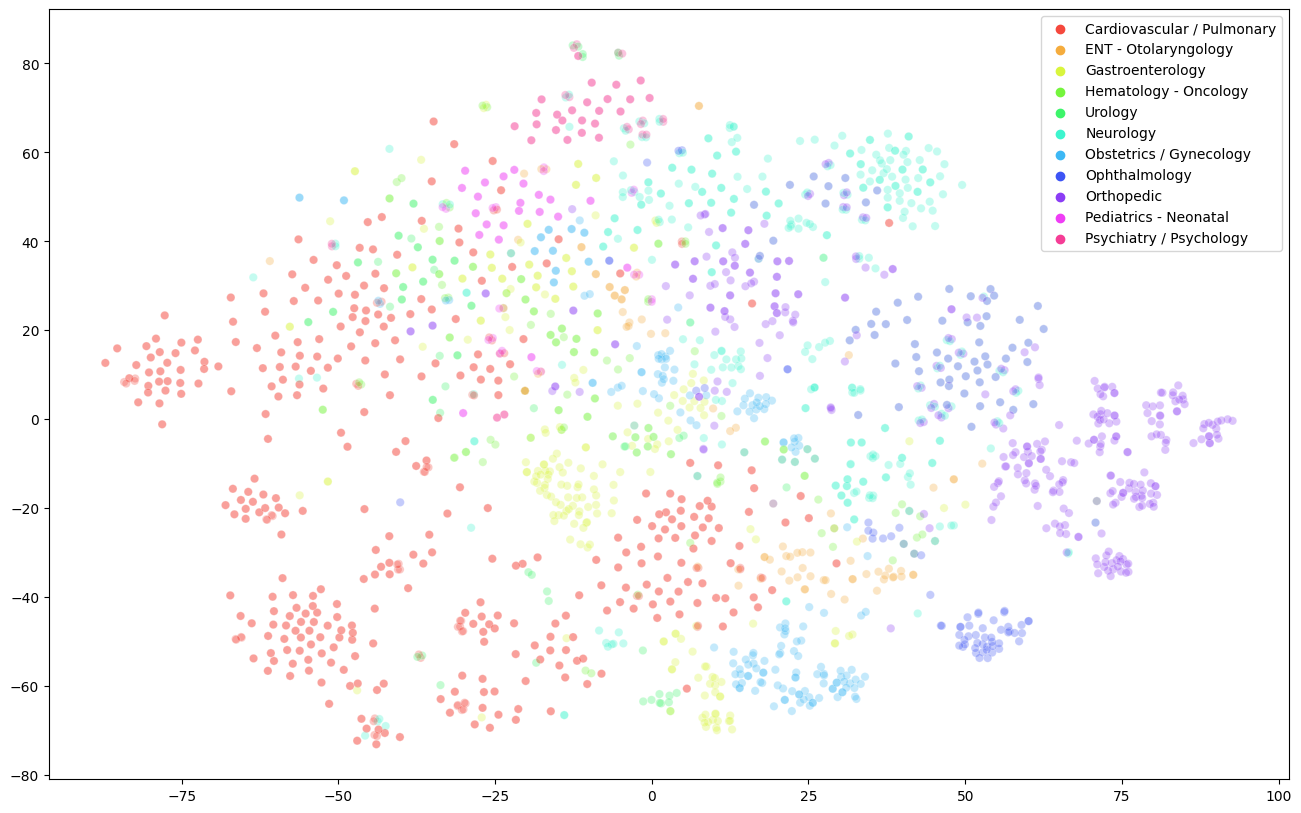

In [17]:
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=1000)
docterm_matrix = vectorizer.fit_transform(data2['transcription'].tolist())

vectorization_results(docterm_matrix.toarray(), data2['medical_specialty'].tolist())

In [18]:
pca = PCA(n_components=0.9)
docterm_matrix_reduced = pca.fit_transform(docterm_matrix.toarray())

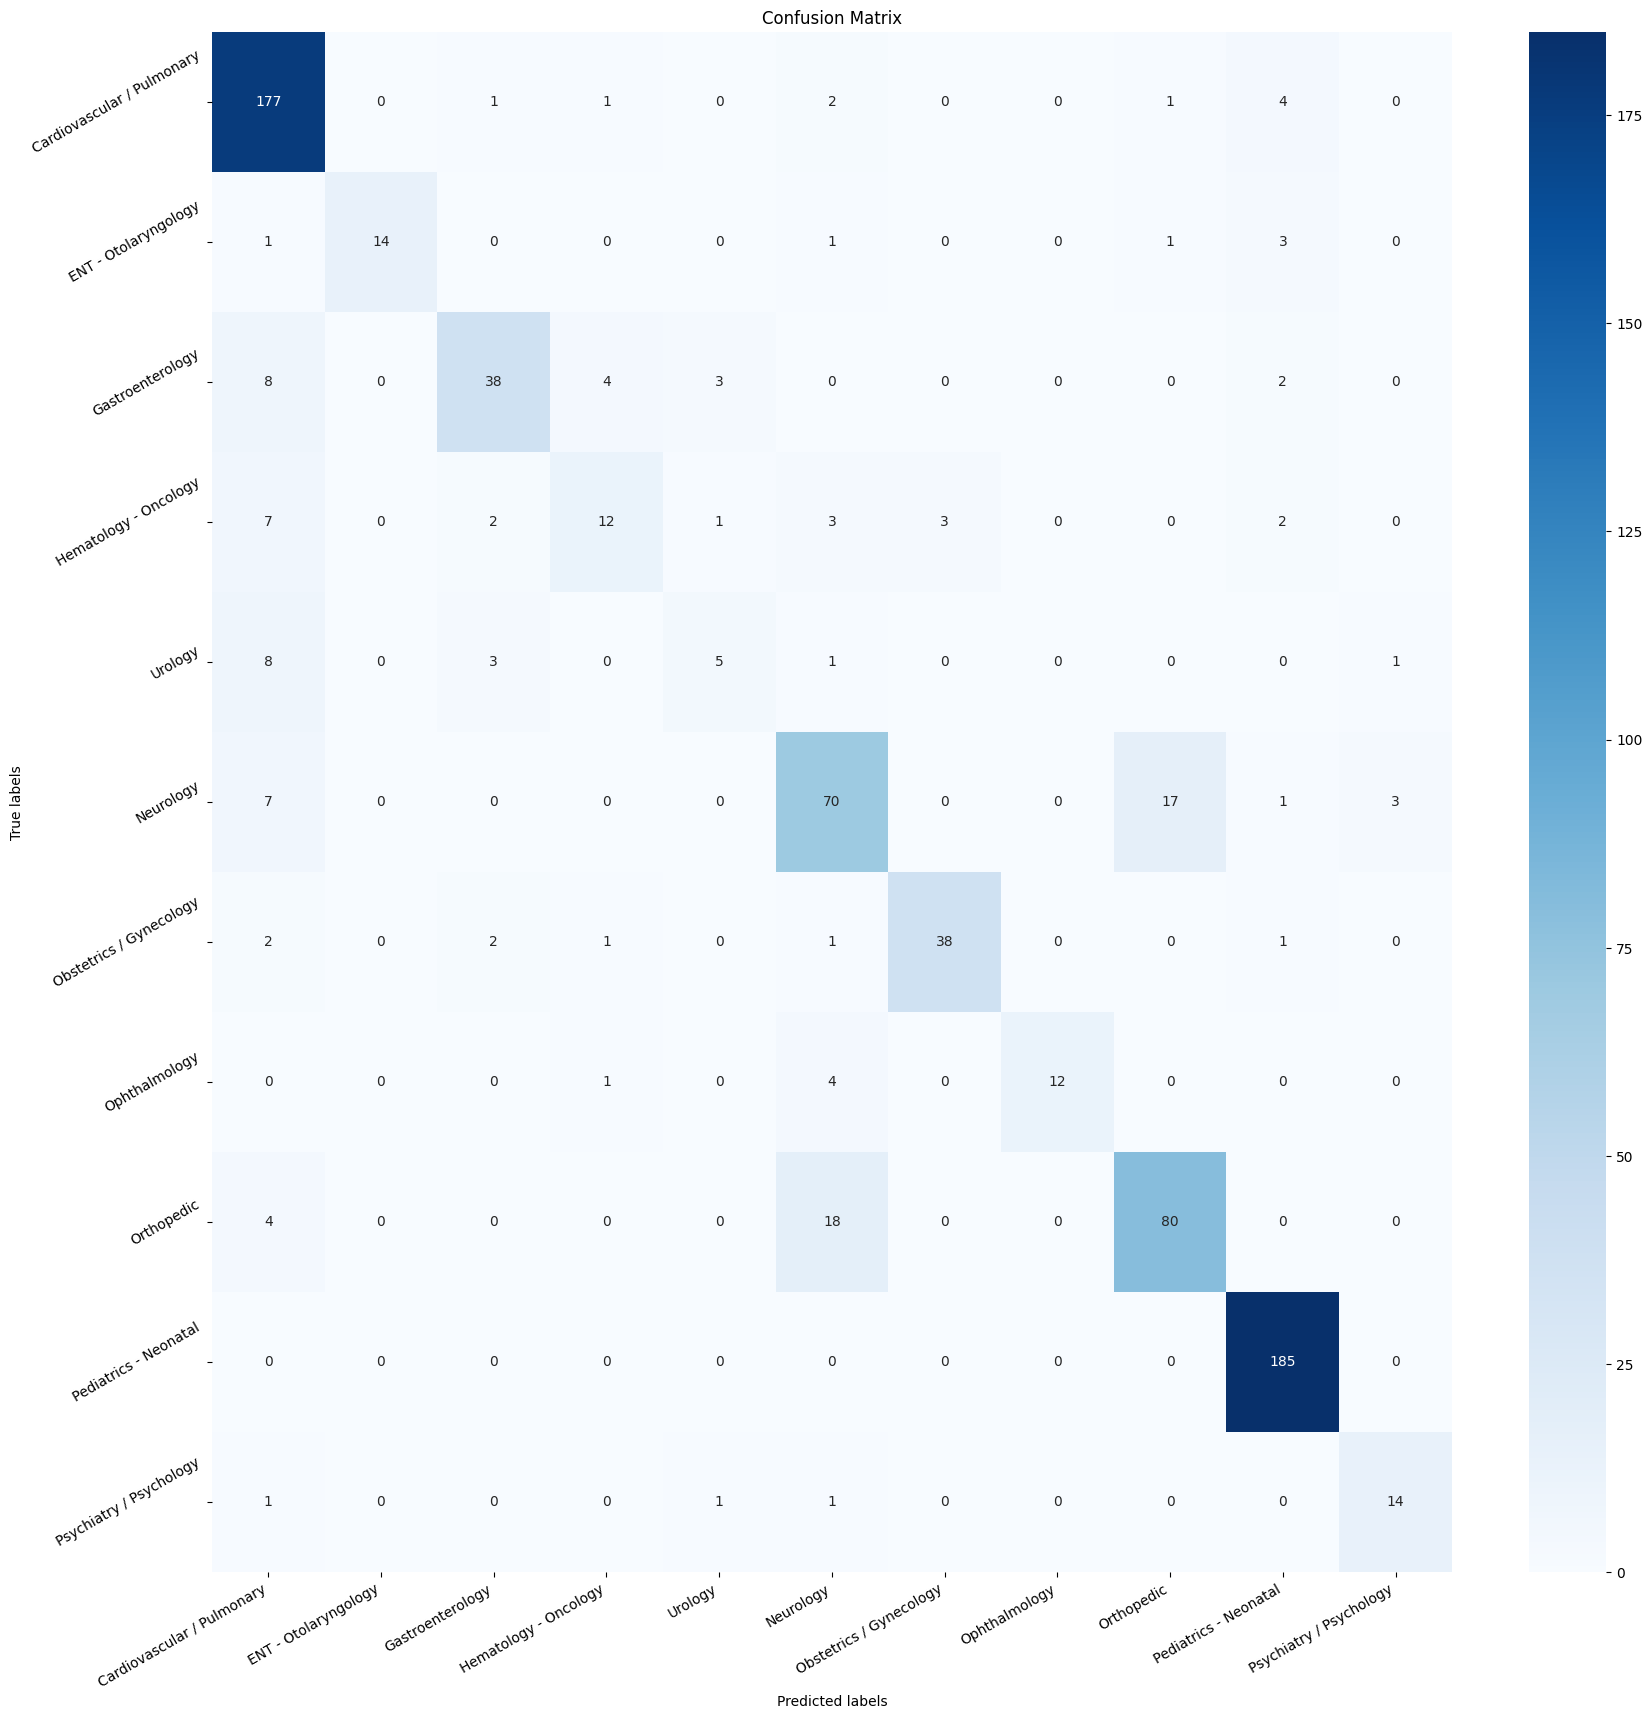

                            precision    recall  f1-score   support

Cardiovascular / Pulmonary       0.82      0.95      0.88       186
      ENT - Otolaryngology       1.00      0.70      0.82        20
          Gastroenterology       0.83      0.69      0.75        55
     Hematology - Oncology       0.63      0.40      0.49        30
                   Urology       0.50      0.28      0.36        18
                 Neurology       0.69      0.71      0.70        98
   Obstetrics / Gynecology       0.93      0.84      0.88        45
             Ophthalmology       1.00      0.71      0.83        17
                Orthopedic       0.81      0.78      0.80       102
     Pediatrics - Neonatal       0.93      1.00      0.97       185
   Psychiatry / Psychology       0.78      0.82      0.80        17

                  accuracy                           0.83       773
                 macro avg       0.81      0.72      0.75       773
              weighted avg       0.83      0.8

In [19]:
labels, category_list = data2['medical_specialty'].tolist(), data2['medical_specialty'].unique()
from imblearn.over_sampling import SMOTE
smote_over_sample = SMOTE(sampling_strategy='minority')

x, y = smote_over_sample.fit_resample(docterm_matrix_reduced, labels)
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=1)   

#x_train, x_test, y_train, y_test = train_test_split(docterm_matrix_reduced, labels, stratify=labels, random_state=1)

clf = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, random_state=1).fit(x_train, y_train)
y_test_pred = clf.predict(x_test)

learning_results(y_test, y_test_pred, category_list)